# DS-SF-25 | Codealong 07 | Introduction to Regression and Model Fit, Part 2

In [3]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

# TODO
from sklearn import feature_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A - Model's F-statistic

In [4]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-07.csv'), index_col = 'ID')

> ### `SalePrice` as a function of `Size`

In [5]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        13:36:46   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalePrice` as a function of `IsAStudio`

In [6]:
model = smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07775
Date:                Thu, 04 Aug 2016   Prob (F-statistic):              0.780
Time:                        13:36:46   Log-Likelihood:                -1847.4
No. Observations:                 986   AIC:                             3699.
Df Residuals:                     984   BIC:                             3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3811      0.051     27.088      0.000         1.281     1.481
IsAStudio      0.0829      0.297      0.279      0.780        -0.501     0.666
==============================================================================
Omnibus:                     1682.807   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342290.714
Skew:                          10.942   Prob(JB):                         0.00
Kurtosis:                     182.425   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model's F-value (with significance level of `5%`)

In [7]:
model.fvalue

0.077751247187816605

### Corresponding p-value

In [8]:
model.f_pvalue

0.78042689060360249

## Part B1 - Linear Regression Modeling with `sklearn`

In [9]:
def summary(X, y, model):
    fvalues, f_pvalues = feature_selection.f_regression(X, y)
    
    fvalues = feature_selection.f_regression(X, y)[0]
    
    print 'F-statistic (not join but instead done sequentially for each regressor)'
    print '- F-value', fvalues
    print '- p-value', f_pvalues
    print

    print 'R^2 =', model.score(X, y)
    print

    print 'Coefficients'
    print '- beta_0 (Intercept) = {}'.format(model.intercept_)
    for i, coef in enumerate(model.coef_):
        print '- beta_{} ({}) = {}'.format(i + 1, X.columns[i], coef)

> ### Remove samples with `NaN` in `IsAStudio`, `Size`, or `LotSize`

In [10]:
df.dropna(subset = ['IsAStudio', 'Size', 'LotSize'], inplace =True)

### SalePrice ~ IsAStudio with `statsmodels`

In [11]:
smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Thu, 04 Aug 2016   Prob (F-statistic):              0.616
Time:                        13:36:46   Log-Likelihood:                -1159.0
No. Observations:                 545   AIC:                             2322.
Df Residuals:                     543   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5571      0.088     17.615      0.000         1.383     1.731
IsAStudio      0.2589      0.516      0.502      0.616        -0.755     1.272
==============================================================================
Omnibus:                      860.527   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301122.117
Skew:                           8.992   Prob(JB):                         0.00
Kurtosis:                     116.741   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### SalePrice ~ IsAStudio with `sklearn`

In [12]:
X = df[ ['IsAStudio'] ]
y = df.SalePrice

# TODO
model = linear_model.LinearRegression().fit(X, y)
summary(X, y, model)

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 0.25187926]
- p-value [ 0.61595836]

R^2 = 0.000463650973037

Coefficients
- beta_0 (Intercept) = 1.55707559924
- beta_1 (IsAStudio) = 0.258924400756


### SalePrice ~ Size + LotSize with `statsmodels`

In [13]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.36e-30
Time:                        13:36:46   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### SalePrice ~ Size + LotSize with `sklearn`

In [14]:
X = df[ ['LotSize' , 'Size'] ]
y = df.SalePrice

# TODO
model = linear_model.LinearRegression().fit(X, y)
summary(X, y, model)

F-statistic (not join but instead done sequentially for each regressor)
- F-value [  11.74608887  154.47734612]
- p-value [  6.55921409e-04   2.18094764e-31]

R^2 = 0.224134357118

Coefficients
- beta_0 (Intercept) = -0.190237755455
- beta_1 (LotSize) = 0.0500489289305
- beta_2 (Size) = 0.81709073459


## Part B2 - Linear Regression Modeling with `sklearn` (cont.)

In [75]:
df = pd.read_csv(os.path.join('..', 'datasets', 'advertising.csv'))

In [76]:
df = df*1000

In [78]:
df.head()

,TV,Radio,Newspaper,Sales
0,230100.0,37800.0,69200.0,22100.0
1,44500.0,39300.0,45100.0,10400.0
2,17200.0,45900.0,69300.0,9300.0
3,151500.0,41300.0,58500.0,18500.0
4,180800.0,10800.0,58400.0,12900.0


## Plots

> ### Sales ~ TV

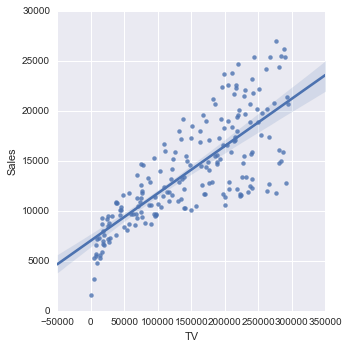

In [79]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

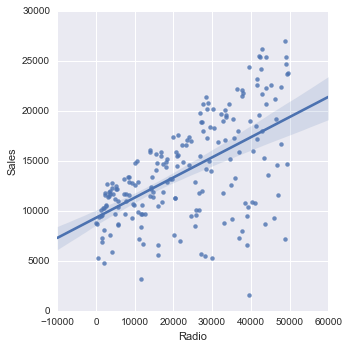

In [80]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

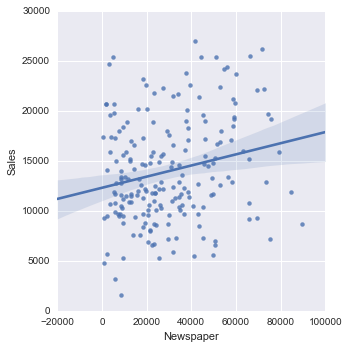

In [81]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

## Simple linear regressions

> ### Sales ~ TV

In [82]:
model_tv = smf.ols(formula = 'Sales ~ TV', data=df).fit()

model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.29e-41
Time:                        14:20:18   Log-Likelihood:                -1882.0
No. Observations:                 198   AIC:                             3768.
Df Residuals:                     196   BIC:                             3775.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7030.5615    461.962     15.219      0.000      6119.508  7941.615
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                     3.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> ### Sales ~ Radio

In [83]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data=df).fit()

model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           5.99e-19
Time:                        14:21:16   Log-Likelihood:                -1934.4
No. Observations:                 198   AIC:                             3873.
Df Residuals:                     196   BIC:                             3879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9316.6482    560.487     16.622      0.000      8211.288  1.04e+04
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                     5.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> ### Sales ~ Newspaper

In [84]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data=df).fit()

model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Thu, 04 Aug 2016   Prob (F-statistic):            0.00188
Time:                        14:21:37   Log-Likelihood:                -1969.6
No. Observations:                 198   AIC:                             3943.
Df Residuals:                     196   BIC:                             3950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.232e+04    639.170     19.274      0.000      1.11e+04  1.36e+04
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                     6.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residuals

> ### Sales ~ TV

In [85]:
model_tv.resid.mean()

-1.676593768419792e-12

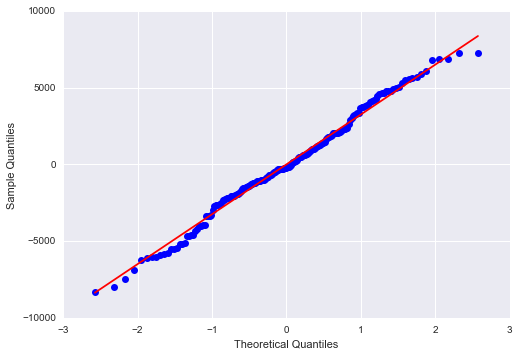

In [86]:
sm.qqplot(model_tv.resid, line = 's')
pass

> ### Sales ~ Radio

In [87]:
model_radio.resid.mean()

4.5382866936952174e-12

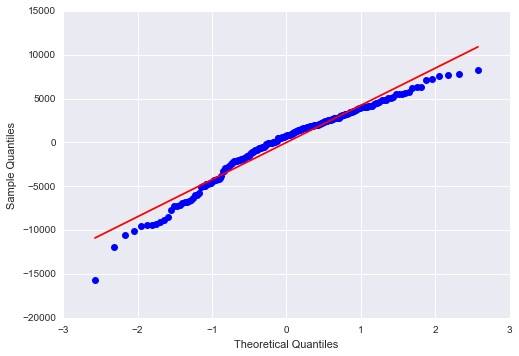

In [88]:
sm.qqplot(model_radio.resid, line = 's')
pass

> ### Sales ~ Newspaper

In [89]:
model_newspaper.resid.mean()

-1.561758578801998e-12

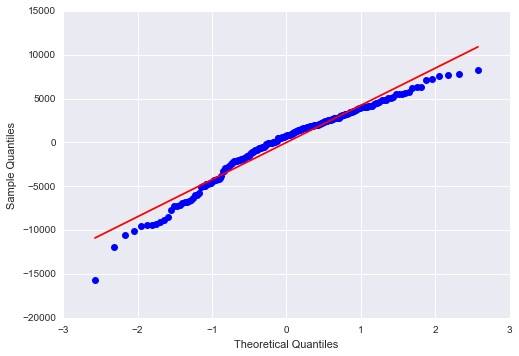

In [90]:
sm.qqplot(model_radio.resid, line='s')
pass

> ### Sales ~ TV + Radio + Newspaper

In [92]:
model = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           8.35e-95
Time:                        14:22:34   Log-Likelihood:                -1751.0
No. Observations:                 198   AIC:                             3510.
Df Residuals:                     194   BIC:                             3523.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2952.3086    318.141      9.280      0.000      2324.849  3579.769
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                     4.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> ### Sales ~ TV + Radio

In [93]:
model = smf.ols(formula = 'Sales ~ TV + Radio', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.60e-96
Time:                        14:22:37   Log-Likelihood:                -1751.0
No. Observations:                 198   AIC:                             3508.
Df Residuals:                     195   BIC:                             3518.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2931.4759    297.282      9.861      0.000      2345.174  3517.777
TV             0.0457      0.001     32.385      0.000         0.043     0.048
Radio          0.1880      0.008     23.182      0.000         0.172     0.204
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                     4.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

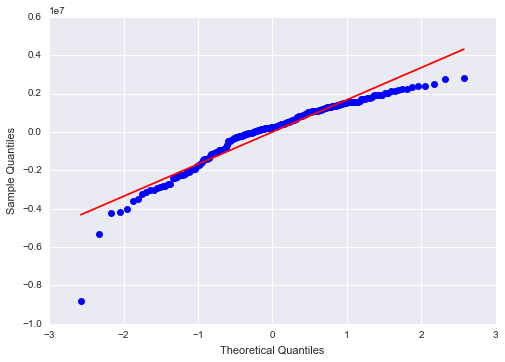

In [58]:
sm.qqplot(model.resid, line = 's')

pass

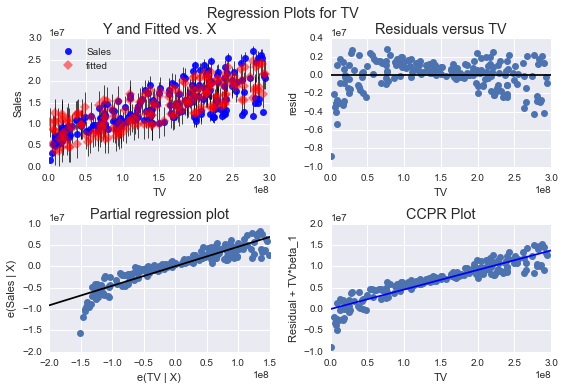

In [59]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

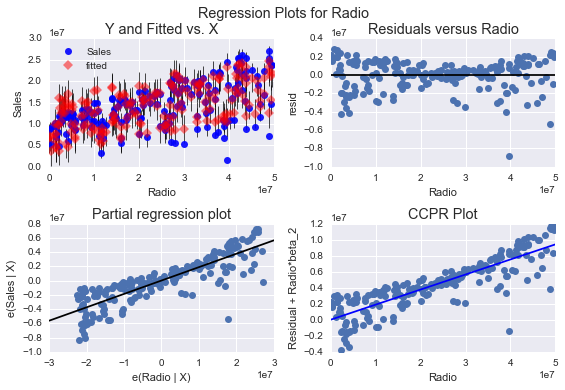

In [60]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part C - Interaction Effects

### Sales ~ TV + Radio + TV * Radio

In [95]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 04 Aug 2016   Prob (F-statistic):          3.19e-144
Time:                        14:25:00   Log-Likelihood:                -1634.8
No. Observations:                 198   AIC:                             3278.
Df Residuals:                     194   BIC:                             3291.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6757.6751    247.494     27.304      0.000      6269.551  7245.800
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio    1.096e-06   5.27e-08     20.817      0.000      9.92e-07   1.2e-06
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.77e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
predict_x = pd.DataFrame({'TV':[50000,50000,50000], 'Radio':[5000,10000,15000]})

In [98]:
model.predict(predict_x)

array([ 8121.97285313,  8533.97216143,  8945.97146973])

In [99]:
predict_x2 = pd.DataFrame({'TV':[55000,55000,55000], 'Radio':[5000,10000,15000]})

In [100]:
model.predict(predict_x2)

array([ 8244.60461104,  8684.00583197,  9123.4070529 ])

In [101]:
print 8244.60461104 - 8121.97285313

122.63175791


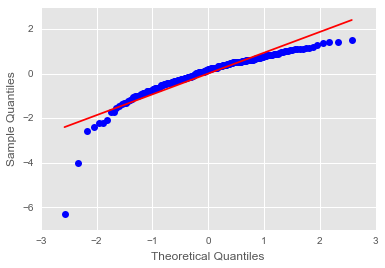

In [106]:
sm.qqplot(model.resid, line = 's')

pass

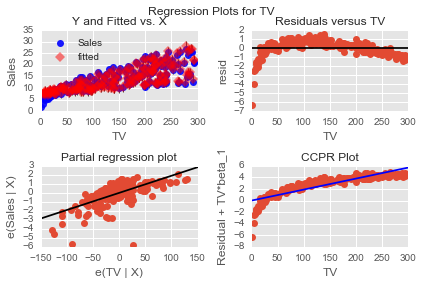

In [107]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass

## Part D - One-hot encoding for categorical variables

In [ ]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-07.csv'), index_col = 'ID')

In [ ]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [ ]:
smf.ols(formula = 'SalePrice ~ BathCount', data = df).fit().summary()

> ### What's the bathrooms' distribution in the dataset?

In [ ]:
# TODO

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [ ]:
# TODO

> ### Let's use `pandas`'s `get_dummies` to create our one-hot encoding

In [ ]:
# TODO

In [ ]:
baths_df

In [ ]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
                           'Bath_2.0': 'Bath_2',
                           'Bath_3.0': 'Bath_3',
                           'Bath_4.0': 'Bath_4'}, inplace = True)

In [ ]:
baths_df

In [ ]:
df = df.join([baths_df])

In [ ]:
df.columns

## Activity | One-hot encoding for categorical variables

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO